# Investigating airline passenger satisfaction: Data mining method

**Importing necessary libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

**Preparing the dataframe**

In [3]:
df_train = pd.read_csv('train.csv')

In [4]:
dt_test = pd.read_csv('test.csv')

In [5]:
data = pd.concat((df_train, dt_test), axis = 0)

**Analysing the data**

In [6]:
data.shape

(129880, 25)

In [7]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [8]:
data.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied
25975,25975,34799,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,...,1,1,2,1,1,1,1,0,0.0,neutral or dissatisfied


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      129880 non

**Remove first 2 columns**

In [10]:
data = data.drop(data.iloc[:,[0, 1]], axis = 1)

**Handling Missing Values**

In [11]:
data.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [12]:
data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median(axis = 0), inplace = True)

In [13]:
data.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [14]:
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.045465
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.416353
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [15]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


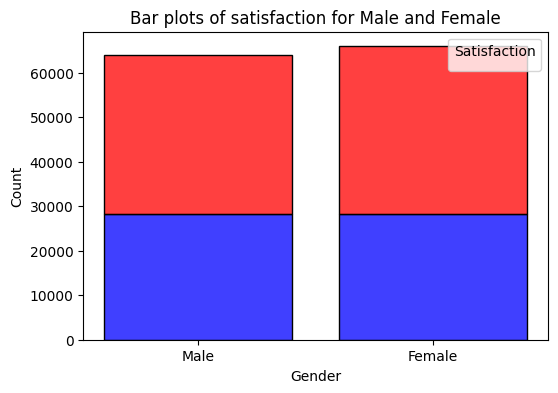

In [16]:
plt.figure(figsize=(6, 4))

sns.histplot(data=data, x='Gender', hue='satisfaction', palette=['red', 'blue'], multiple='stack', shrink=.8)

plt.title('Bar plots of satisfaction for Male and Female')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Satisfaction')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


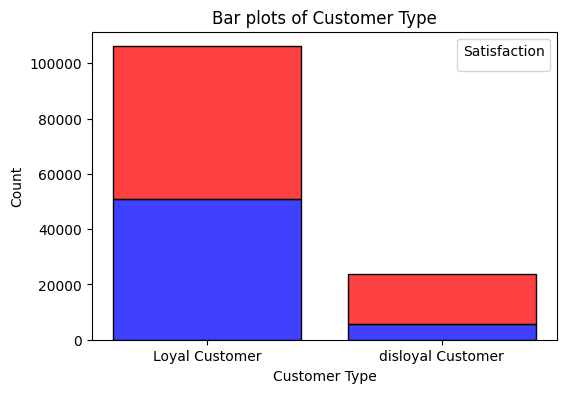

In [17]:
plt.figure(figsize=(6, 4))

sns.histplot(data=data, x='Customer Type', hue='satisfaction', palette=['red', 'blue'], multiple='stack', shrink=.8)

plt.title('Bar plots of Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.legend(title='Satisfaction')

plt.show()

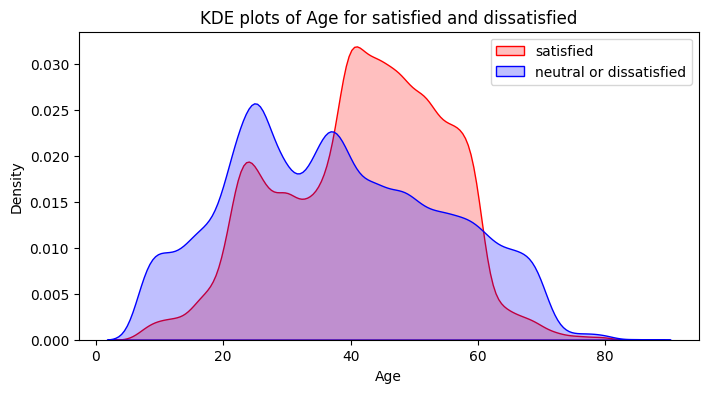

In [18]:
satisfied = data[data['satisfaction'] == 'satisfied']
dissatisfied = data[data['satisfaction'] == 'neutral or dissatisfied']

plt.figure(figsize=(8, 4))

sns.kdeplot(satisfied['Age'], color='red', shade=True, label='satisfied')
sns.kdeplot(dissatisfied['Age'], color='blue', shade=True, label='neutral or dissatisfied')

plt.title('KDE plots of Age for satisfied and dissatisfied')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


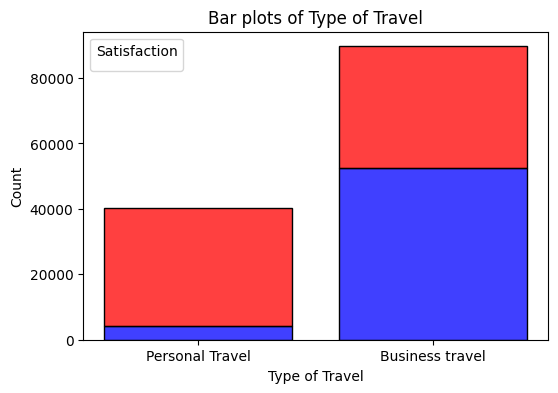

In [19]:
plt.figure(figsize=(6, 4))

sns.histplot(data=data, x='Type of Travel', hue='satisfaction', palette=['red', 'blue'], multiple='stack', shrink=.8)

plt.title('Bar plots of Type of Travel')
plt.xlabel('Type of Travel')
plt.ylabel('Count')
plt.legend(title='Satisfaction')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


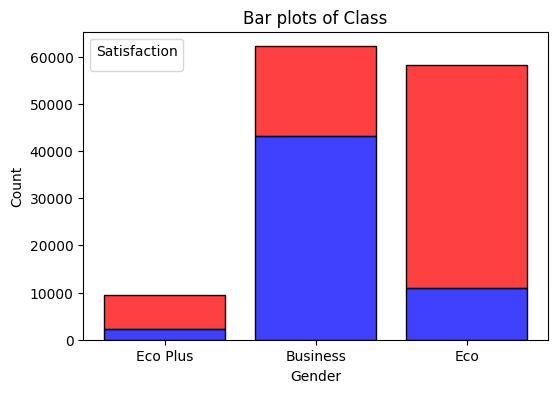

In [20]:
plt.figure(figsize=(6, 4))

sns.histplot(data=data, x='Class', hue='satisfaction', palette=['red', 'blue'], multiple='stack', shrink=.8)

plt.title('Bar plots of Class')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Satisfaction')

plt.show()

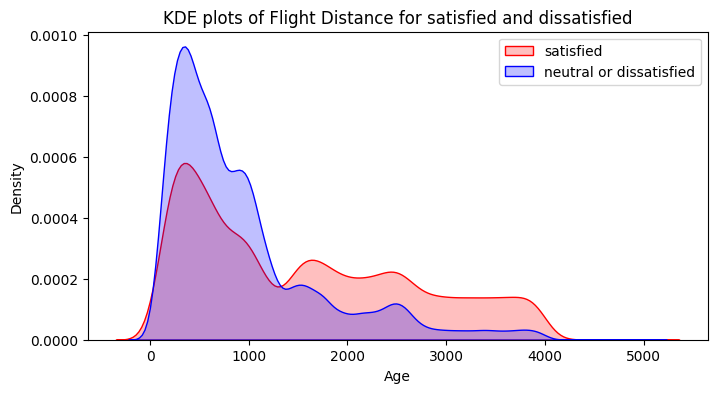

In [21]:
satisfied = data[data['satisfaction'] == 'satisfied']
dissatisfied = data[data['satisfaction'] == 'neutral or dissatisfied']

plt.figure(figsize=(8, 4))

sns.kdeplot(satisfied['Flight Distance'], color='red', shade=True, label='satisfied')
sns.kdeplot(dissatisfied['Flight Distance'], color='blue', shade=True, label='neutral or dissatisfied')

plt.title('KDE plots of Flight Distance for satisfied and dissatisfied')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

plt.show()

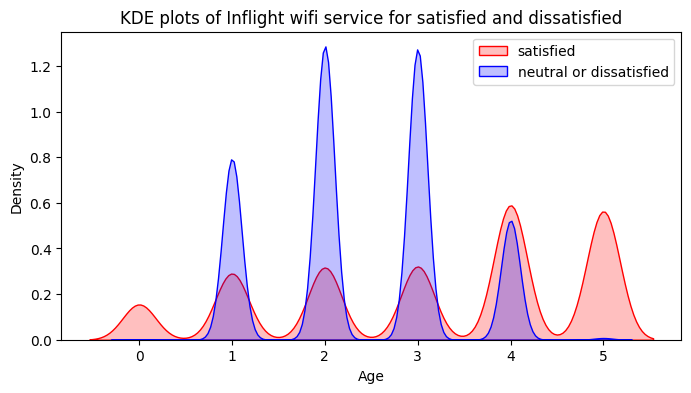

In [22]:
satisfied = data[data['satisfaction'] == 'satisfied']
dissatisfied = data[data['satisfaction'] == 'neutral or dissatisfied']

plt.figure(figsize=(8, 4))

sns.kdeplot(satisfied['Inflight wifi service'], color='red', shade=True, label='satisfied')
sns.kdeplot(dissatisfied['Inflight wifi service'], color='blue', shade=True, label='neutral or dissatisfied')

plt.title('KDE plots of Inflight wifi service for satisfied and dissatisfied')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

plt.show()

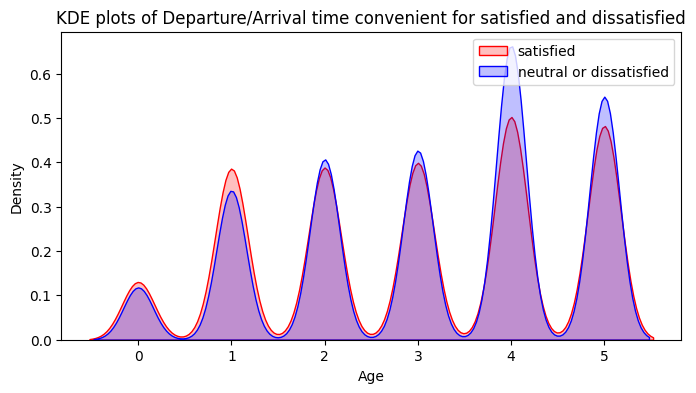

In [23]:
satisfied = data[data['satisfaction'] == 'satisfied']
dissatisfied = data[data['satisfaction'] == 'neutral or dissatisfied']

plt.figure(figsize=(8, 4))

sns.kdeplot(satisfied['Departure/Arrival time convenient'], color='red', shade=True, label='satisfied')
sns.kdeplot(dissatisfied['Departure/Arrival time convenient'], color='blue', shade=True, label='neutral or dissatisfied')

plt.title('KDE plots of Departure/Arrival time convenient for satisfied and dissatisfied')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

plt.show()

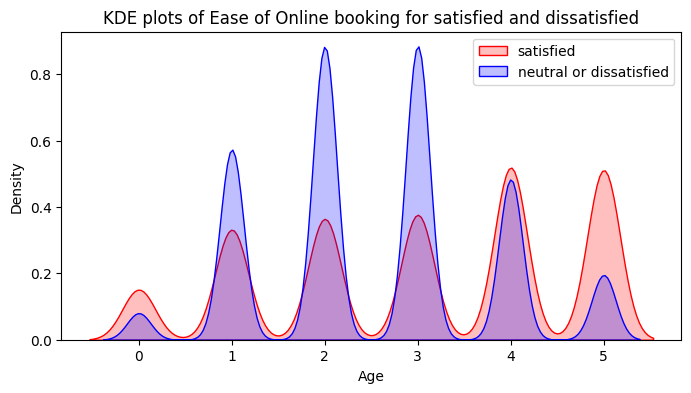

In [24]:
satisfied = data[data['satisfaction'] == 'satisfied']
dissatisfied = data[data['satisfaction'] == 'neutral or dissatisfied']

plt.figure(figsize=(8, 4))

sns.kdeplot(satisfied['Ease of Online booking'], color='red', shade=True, label='satisfied')
sns.kdeplot(dissatisfied['Ease of Online booking'], color='blue', shade=True, label='neutral or dissatisfied')

plt.title('KDE plots of Ease of Online booking for satisfied and dissatisfied')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

plt.show()

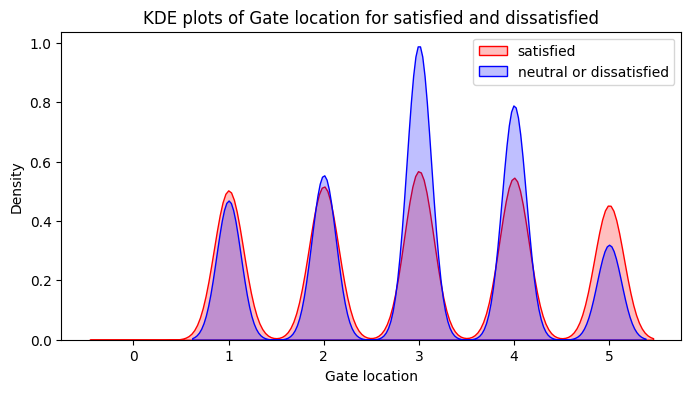

In [25]:
satisfied = data[data['satisfaction'] == 'satisfied']
dissatisfied = data[data['satisfaction'] == 'neutral or dissatisfied']

plt.figure(figsize=(8, 4))

sns.kdeplot(satisfied['Gate location'], color='red', shade=True, label='satisfied')
sns.kdeplot(dissatisfied['Gate location'], color='blue', shade=True, label='neutral or dissatisfied')

plt.title('KDE plots of Gate location for satisfied and dissatisfied')
plt.xlabel('Gate location')
plt.ylabel('Density')
plt.legend()

plt.show()

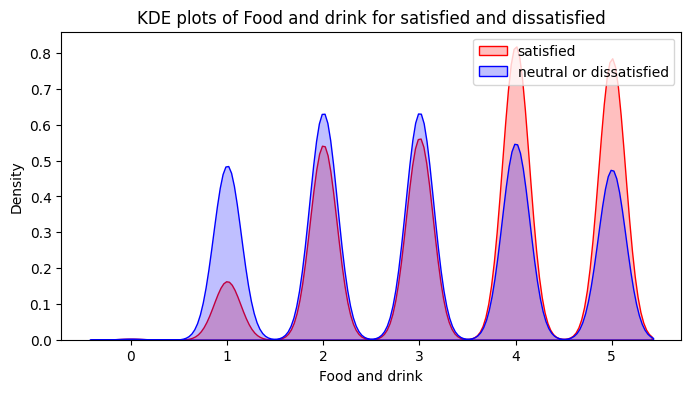

In [26]:
satisfied = data[data['satisfaction'] == 'satisfied']
dissatisfied = data[data['satisfaction'] == 'neutral or dissatisfied']

plt.figure(figsize=(8, 4))

sns.kdeplot(satisfied['Food and drink'], color='red', shade=True, label='satisfied')
sns.kdeplot(dissatisfied['Food and drink'], color='blue', shade=True, label='neutral or dissatisfied')

plt.title('KDE plots of Food and drink for satisfied and dissatisfied')
plt.xlabel('Food and drink')
plt.ylabel('Density')
plt.legend()

plt.show()

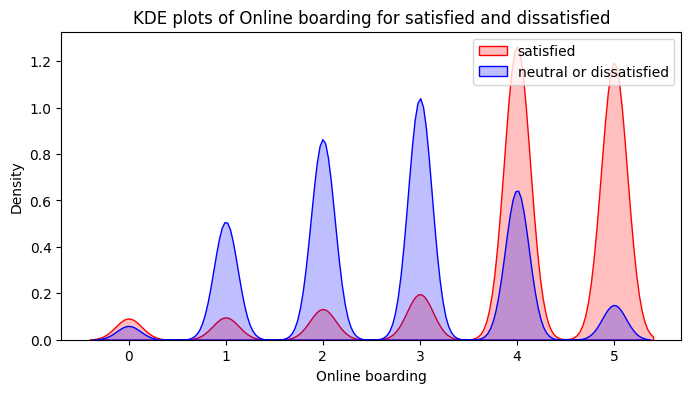

In [27]:
satisfied = data[data['satisfaction'] == 'satisfied']
dissatisfied = data[data['satisfaction'] == 'neutral or dissatisfied']

plt.figure(figsize=(8, 4))

sns.kdeplot(satisfied['Online boarding'], color='red', shade=True, label='satisfied')
sns.kdeplot(dissatisfied['Online boarding'], color='blue', shade=True, label='neutral or dissatisfied')

plt.title('KDE plots of Online boarding for satisfied and dissatisfied')
plt.xlabel('Online boarding')
plt.ylabel('Density')
plt.legend()

plt.show()

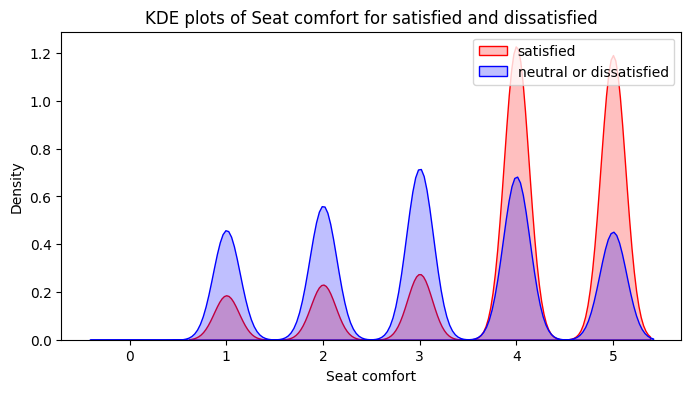

In [28]:
satisfied = data[data['satisfaction'] == 'satisfied']
dissatisfied = data[data['satisfaction'] == 'neutral or dissatisfied']

plt.figure(figsize=(8, 4))

sns.kdeplot(satisfied['Seat comfort'], color='red', shade=True, label='satisfied')
sns.kdeplot(dissatisfied['Seat comfort'], color='blue', shade=True, label='neutral or dissatisfied')

plt.title('KDE plots of Seat comfort for satisfied and dissatisfied')
plt.xlabel('Seat comfort')
plt.ylabel('Density')
plt.legend()

plt.show()

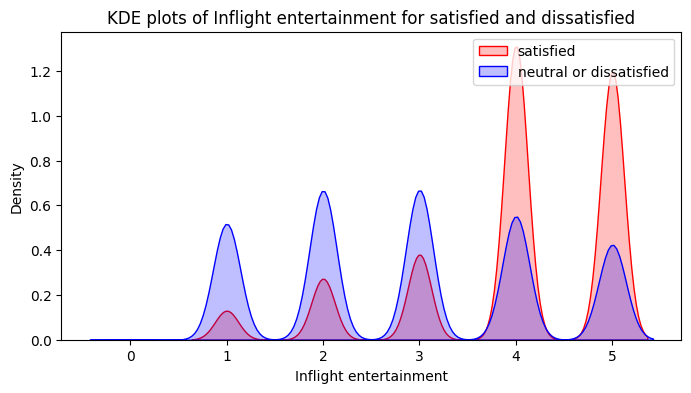

In [29]:
satisfied = data[data['satisfaction'] == 'satisfied']
dissatisfied = data[data['satisfaction'] == 'neutral or dissatisfied']

plt.figure(figsize=(8, 4))

sns.kdeplot(satisfied['Inflight entertainment'], color='red', shade=True, label='satisfied')
sns.kdeplot(dissatisfied['Inflight entertainment'], color='blue', shade=True, label='neutral or dissatisfied')

plt.title('KDE plots of Inflight entertainment for satisfied and dissatisfied')
plt.xlabel('Inflight entertainment')
plt.ylabel('Density')
plt.legend()

plt.show()

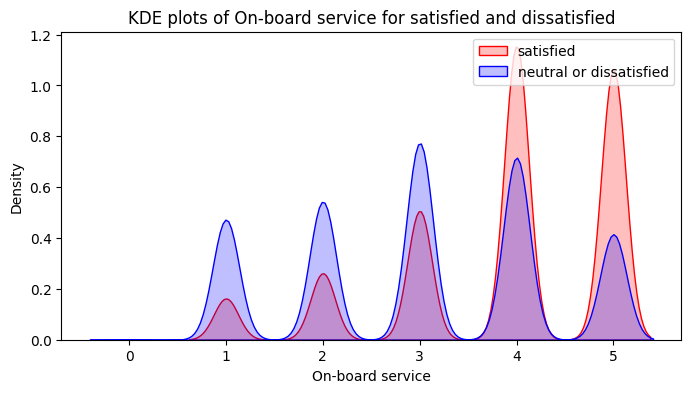

In [30]:
satisfied = data[data['satisfaction'] == 'satisfied']
dissatisfied = data[data['satisfaction'] == 'neutral or dissatisfied']

plt.figure(figsize=(8, 4))

sns.kdeplot(satisfied['On-board service'], color='red', shade=True, label='satisfied')
sns.kdeplot(dissatisfied['On-board service'], color='blue', shade=True, label='neutral or dissatisfied')

plt.title('KDE plots of On-board service for satisfied and dissatisfied')
plt.xlabel('On-board service')
plt.ylabel('Density')
plt.legend()

plt.show()

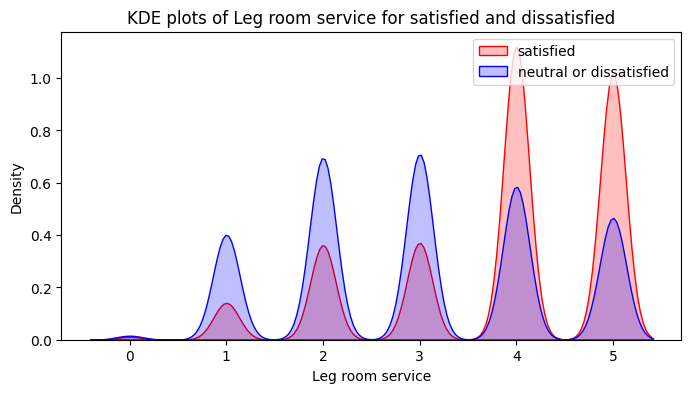

In [31]:
satisfied = data[data['satisfaction'] == 'satisfied']
dissatisfied = data[data['satisfaction'] == 'neutral or dissatisfied']

plt.figure(figsize=(8, 4))

sns.kdeplot(satisfied['Leg room service'], color='red', shade=True, label='satisfied')
sns.kdeplot(dissatisfied['Leg room service'], color='blue', shade=True, label='neutral or dissatisfied')

plt.title('KDE plots of Leg room service for satisfied and dissatisfied')
plt.xlabel('Leg room service')
plt.ylabel('Density')
plt.legend()

plt.show()

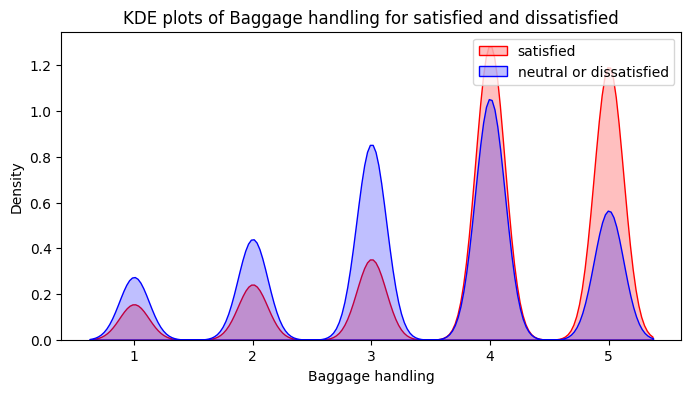

In [32]:
satisfied = data[data['satisfaction'] == 'satisfied']
dissatisfied = data[data['satisfaction'] == 'neutral or dissatisfied']

plt.figure(figsize=(8, 4))

sns.kdeplot(satisfied['Baggage handling'], color='red', shade=True, label='satisfied')
sns.kdeplot(dissatisfied['Baggage handling'], color='blue', shade=True, label='neutral or dissatisfied')

plt.title('KDE plots of Baggage handling for satisfied and dissatisfied')
plt.xlabel('Baggage handling')
plt.ylabel('Density')
plt.legend()

plt.show()

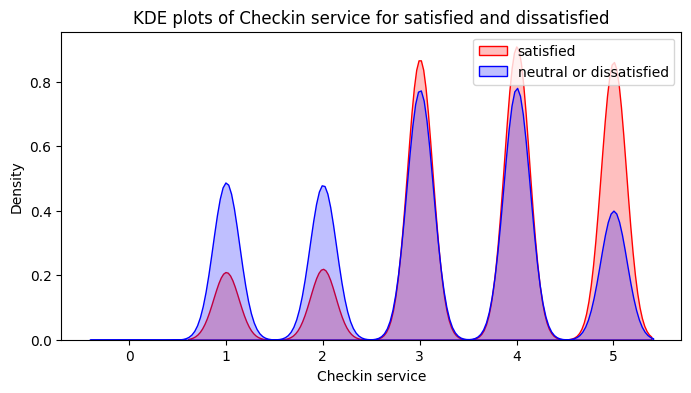

In [33]:
satisfied = data[data['satisfaction'] == 'satisfied']
dissatisfied = data[data['satisfaction'] == 'neutral or dissatisfied']

plt.figure(figsize=(8, 4))

sns.kdeplot(satisfied['Checkin service'], color='red', shade=True, label='satisfied')
sns.kdeplot(dissatisfied['Checkin service'], color='blue', shade=True, label='neutral or dissatisfied')

plt.title('KDE plots of Checkin service for satisfied and dissatisfied')
plt.xlabel('Checkin service')
plt.ylabel('Density')
plt.legend()

plt.show()

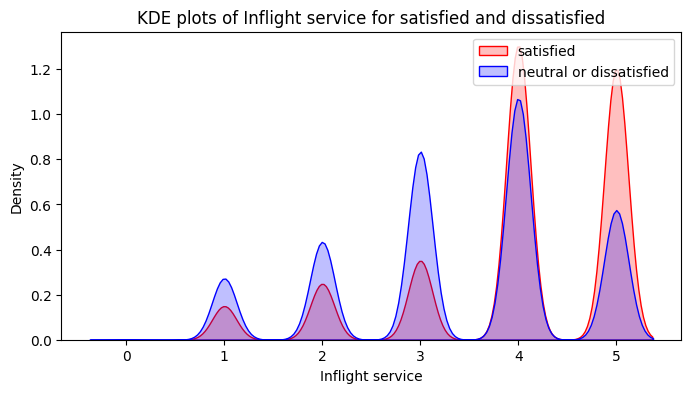

In [34]:
satisfied = data[data['satisfaction'] == 'satisfied']
dissatisfied = data[data['satisfaction'] == 'neutral or dissatisfied']

plt.figure(figsize=(8, 4))

sns.kdeplot(satisfied['Inflight service'], color='red', shade=True, label='satisfied')
sns.kdeplot(dissatisfied['Inflight service'], color='blue', shade=True, label='neutral or dissatisfied')

plt.title('KDE plots of Inflight service for satisfied and dissatisfied')
plt.xlabel('Inflight service')
plt.ylabel('Density')
plt.legend()

plt.show()

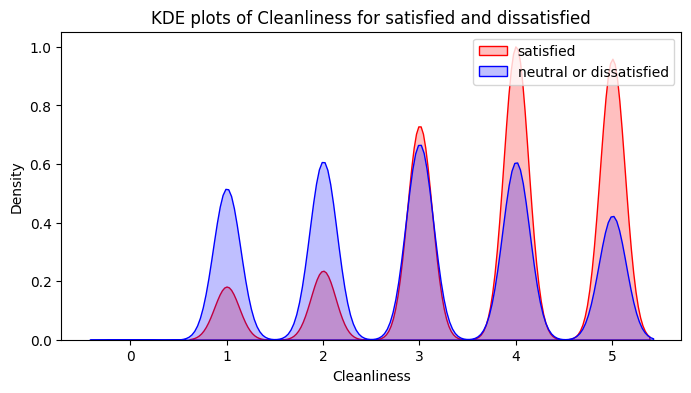

In [35]:
satisfied = data[data['satisfaction'] == 'satisfied']
dissatisfied = data[data['satisfaction'] == 'neutral or dissatisfied']

plt.figure(figsize=(8, 4))

sns.kdeplot(satisfied['Cleanliness'], color='red', shade=True, label='satisfied')
sns.kdeplot(dissatisfied['Cleanliness'], color='blue', shade=True, label='neutral or dissatisfied')

plt.title('KDE plots of Cleanliness for satisfied and dissatisfied')
plt.xlabel('Cleanliness')
plt.ylabel('Density')
plt.legend()

plt.show()

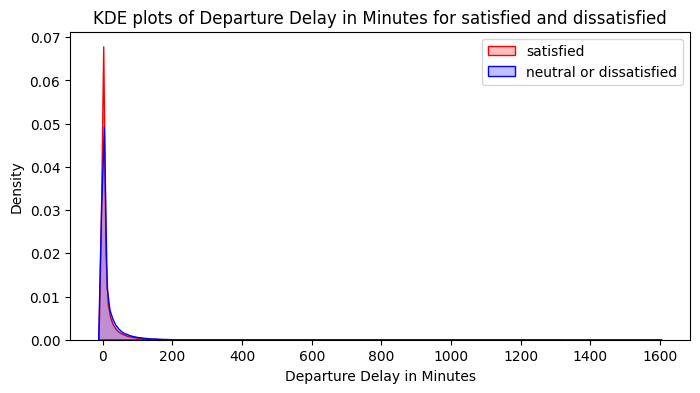

In [36]:
satisfied = data[data['satisfaction'] == 'satisfied']
dissatisfied = data[data['satisfaction'] == 'neutral or dissatisfied']

plt.figure(figsize=(8, 4))

sns.kdeplot(satisfied['Departure Delay in Minutes'], color='red', shade=True, label='satisfied')
sns.kdeplot(dissatisfied['Departure Delay in Minutes'], color='blue', shade=True, label='neutral or dissatisfied')

plt.title('KDE plots of Departure Delay in Minutes for satisfied and dissatisfied')
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Density')
plt.legend()

plt.show()

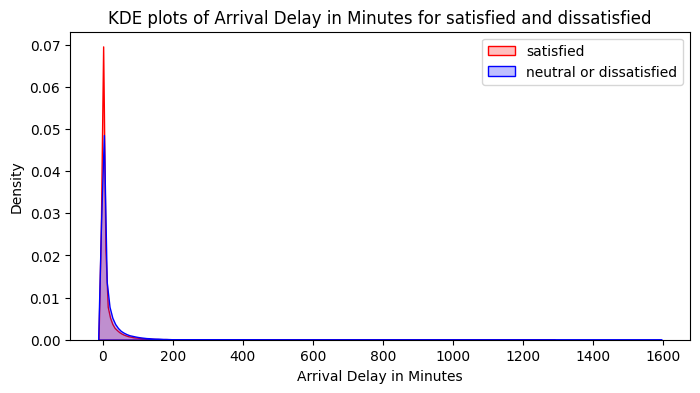

In [37]:
satisfied = data[data['satisfaction'] == 'satisfied']
dissatisfied = data[data['satisfaction'] == 'neutral or dissatisfied']

plt.figure(figsize=(8, 4))

sns.kdeplot(satisfied['Arrival Delay in Minutes'], color='red', shade=True, label='satisfied')
sns.kdeplot(dissatisfied['Arrival Delay in Minutes'], color='blue', shade=True, label='neutral or dissatisfied')

plt.title('KDE plots of Arrival Delay in Minutes for satisfied and dissatisfied')
plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Density')
plt.legend()

plt.show()

In [38]:
y = data.iloc[:,-1]
data = data.iloc[:,0:22]

In [39]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    129880 non

**Feature Encoding**

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = data.columns.tolist()
for column in cols:
    if data[column].dtype == 'object':
        data[column] = le.fit_transform(data[column])

**Checking Correlation**

In [42]:
corr_mat = data.corr()
corr_mat

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Gender,1.000000,-0.030958,0.008996,0.009503,-0.011574,0.003616,0.005901,0.008995,0.005893,-0.000863,...,-0.030756,0.003843,0.006447,0.031047,0.036356,0.008462,0.038504,0.002867,0.003491,0.001286
Customer Type,-0.030958,1.000000,-0.284172,-0.308236,0.042994,-0.226021,-0.005757,-0.206873,-0.018059,0.004465,...,-0.156239,-0.106001,-0.054172,-0.046841,0.024874,-0.031243,0.023292,-0.081302,0.003859,0.004769
Age,0.008996,-0.284172,1.000000,-0.044808,-0.116921,0.099459,0.016116,0.036960,0.022565,-0.000398,...,0.159136,0.074947,0.057078,0.039119,-0.047991,0.033475,-0.051347,0.052565,-0.009041,-0.011206
Type of Travel,0.009503,-0.308236,-0.044808,1.000000,0.486718,-0.266792,-0.105865,0.257102,-0.134078,-0.029869,...,-0.127717,-0.152936,-0.059794,-0.139612,-0.033012,0.016247,-0.023538,-0.084615,-0.005913,-0.005972
Class,-0.011574,0.042994,-0.116921,0.486718,1.000000,-0.426925,-0.024962,0.087152,-0.095138,-0.005701,...,-0.212334,-0.183162,-0.210649,-0.198825,-0.166588,-0.157494,-0.159285,-0.129623,0.009530,0.014037
Flight Distance,0.003616,-0.226021,0.099459,-0.266792,-0.426925,1.000000,0.006701,-0.018914,0.065165,0.005520,...,0.157662,0.130507,0.111194,0.134533,0.064855,0.073608,0.059316,0.095648,0.002402,-0.001973
Inflight wifi service,0.005901,-0.005757,0.016116,-0.105865,-0.024962,0.006701,1.000000,0.344915,0.714807,0.338573,...,0.121513,0.207802,0.119928,0.160317,0.120376,0.043762,0.110029,0.131300,-0.015946,-0.017762
Departure/Arrival time convenient,0.008995,-0.206873,0.036960,0.257102,0.087152,-0.018914,0.344915,1.000000,0.437620,0.447510,...,0.008666,-0.008380,0.067297,0.010617,0.070833,0.091132,0.072195,0.009862,0.000778,-0.001005
Ease of Online booking,0.005893,-0.018059,0.022565,-0.134078,-0.095138,0.065165,0.714807,0.437620,1.000000,0.460041,...,0.028561,0.046564,0.039064,0.109450,0.039148,0.008819,0.035373,0.015125,-0.005318,-0.007046
Gate location,-0.000863,0.004465,-0.000398,-0.029869,-0.005701,0.005520,0.338573,0.447510,0.460041,1.000000,...,0.002788,0.002741,-0.029019,-0.005181,0.000972,-0.039353,0.000310,-0.005918,0.005973,0.005643


<Axes: >

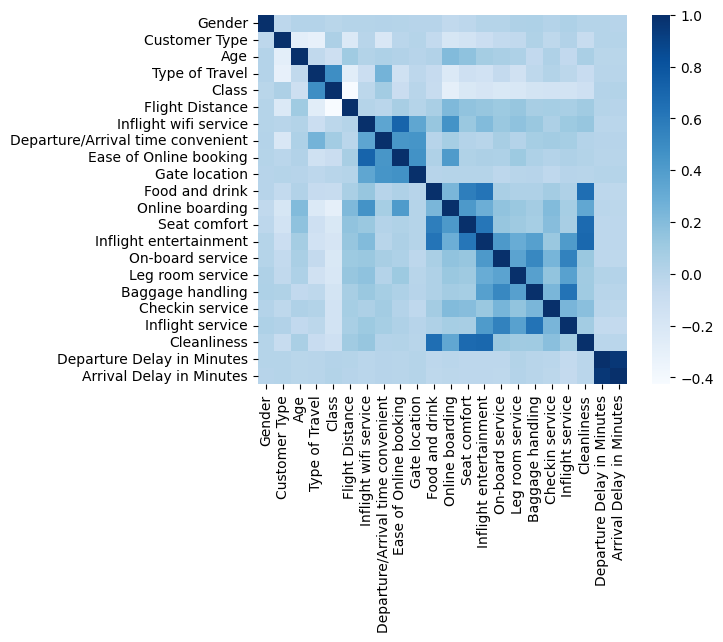

In [43]:
sns.heatmap(corr_mat, square = True, cmap = 'Blues')

In [44]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,13,1,2,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0
2,0,0,26,0,0,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,0,0,25,0,0,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,1,0,61,0,0,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0


In [45]:
columns_to_drop = ['Gender', 'Age']
data = data.drop(columns = columns_to_drop)

**Feature Selection**

In [46]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [47]:
data[data.isnull().any(axis=1)]

,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes


In [48]:
X = data
X2=X

In [49]:
data.shape

(129880, 20)

In [50]:
X

,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,1,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,0,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,0,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,0,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,1,0,0,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0
25972,0,0,0,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0
25973,0,1,1,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0
25974,0,0,0,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0


In [51]:
y2=y.replace({'neutral or dissatisfied':0,'satisfied':1})

In [52]:
y2

0        0
1        0
2        1
3        0
4        1
        ..
25971    0
25972    1
25973    0
25974    1
25975    0
Name: satisfaction, Length: 129880, dtype: int64

In [53]:
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(129880, 20)
(129880,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [54]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier as rfc

In [55]:
feature_names=tuple(X.columns)
feature_names

('Customer Type',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes')

In [56]:
from sklearn.ensemble import RandomForestClassifier
sfs1 = SFS(RandomForestClassifier(n_jobs=-1),
           k_features=5,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

sfs1 = sfs1.fit(X, y)



[2024-05-06 16:00:46] Features: 1/5 -- score: 0.7899445642131198
[2024-05-06 16:01:18] Features: 2/5 -- score: 0.8496766245765321
[2024-05-06 16:01:49] Features: 3/5 -- score: 0.891107175854635
[2024-05-06 16:02:19] Features: 4/5 -- score: 0.9218047428395442
[2024-05-06 16:02:49] Features: 5/5 -- score: 0.9294887588543272

In [57]:
sfs1.k_feature_idx_

(1, 4, 7, 9, 11)

In [58]:
sfs1.k_feature_names_

('Type of Travel',
 'Inflight wifi service',
 'Gate location',
 'Online boarding',
 'Inflight entertainment')

In [59]:
f_names = list(sfs1.k_feature_names_)

In [60]:
sfs1.k_score_

0.9294887588543272

In [61]:
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(9,)","[0.7896904835232522, 0.7923082845703726, 0.793...",0.789945,"(Online boarding,)",0.003179,0.002473,0.001237
2,"(1, 9)","[0.8481290421927934, 0.851093316907915, 0.8505...",0.849677,"(Type of Travel, Online boarding)",0.00163,0.001268,0.000634
3,"(1, 4, 9)","[0.8913612565445026, 0.892054203880505, 0.8925...",0.891107,"(Type of Travel, Inflight wifi service, Online...",0.001682,0.001308,0.000654
4,"(1, 4, 7, 9)","[0.9192331382814906, 0.922928857406837, 0.9225...",0.921805,"(Type of Travel, Inflight wifi service, Gate l...",0.0017,0.001322,0.000661
5,"(1, 4, 7, 9, 11)","[0.9273560209424084, 0.9295888512473052, 0.930...",0.929489,"(Type of Travel, Inflight wifi service, Gate l...",0.001406,0.001094,0.000547


In [62]:
selected_indices = sfs1.k_feature_idx_
selected_features = list(selected_indices)

In [63]:
s_data = data.iloc[:, selected_features]
s_data.head()

,Type of Travel,Inflight wifi service,Gate location,Online boarding,Inflight entertainment
0,1,3,1,3,5
1,0,3,3,3,1
2,0,2,2,5,5
3,0,2,5,2,2
4,0,3,3,5,3


In [64]:
s_data.shape

(129880, 5)

In [65]:
data = s_data
data.head()

,Type of Travel,Inflight wifi service,Gate location,Online boarding,Inflight entertainment
0,1,3,1,3,5
1,0,3,3,3,1
2,0,2,2,5,5
3,0,2,5,2,2
4,0,3,3,5,3


In [66]:
data.shape

(129880, 5)

In [67]:
X = X.iloc[:, selected_features]

**Data Normalization**

In [106]:
data = (data - data.mean(axis = 0))/data.std(axis = 0)
d_mean = data.mean(axis = 0)
d_std = data.std(axis = 0)


In [69]:
data.describe()

,Type of Travel,Inflight wifi service,Gate location,Online boarding,Inflight entertainment
count,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05,1.298800e+05
mean,5.087810e-17,-1.504460e-17,-1.612781e-16,1.463429e-16,8.753221e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-6.693632e-01,-2.052669e+00,-2.328415e+00,-2.408076e+00,-2.517206e+00
25%,-6.693632e-01,-5.481635e-01,-7.641062e-01,-9.273827e-01,-1.018011e+00
50%,-6.693632e-01,2.040894e-01,1.804833e-02,-1.870361e-01,4.811842e-01
75%,1.493946e+00,9.563424e-01,8.002029e-01,5.533104e-01,4.811842e-01
max,1.493946e+00,1.708595e+00,1.582357e+00,1.293657e+00,1.230782e+00


In [70]:
data.head()

,Type of Travel,Inflight wifi service,Gate location,Online boarding,Inflight entertainment
0,1.493946,0.204089,-1.546261,-0.187036,1.230782
1,-0.669363,0.204089,0.018048,-0.187036,-1.767609
2,-0.669363,-0.548163,-0.764106,1.293657,1.230782
3,-0.669363,-0.548163,1.582357,-0.927383,-1.018011
4,-0.669363,0.204089,0.018048,1.293657,-0.268413


In [71]:
X = data

In [72]:
X.columns

Index(['Type of Travel', 'Inflight wifi service', 'Gate location',
       'Online boarding', 'Inflight entertainment'],
      dtype='object')

In [73]:
y

0        neutral or dissatisfied
1        neutral or dissatisfied
2                      satisfied
3        neutral or dissatisfied
4                      satisfied
                  ...           
25971    neutral or dissatisfied
25972                  satisfied
25973    neutral or dissatisfied
25974                  satisfied
25975    neutral or dissatisfied
Name: satisfaction, Length: 129880, dtype: object

**Train Test Split**

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 777)

In [75]:
X_train.shape

(116892, 5)

In [76]:
X_test.shape

(12988, 5)

**Model Training and fitting**

**KNN**

In [77]:
objects = []
algos = []
accuracy = []

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.set_params(n_neighbors = 10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
objects.append(knn)
algos.append('KNN')
from sklearn.metrics import accuracy_score
print('Model accuracy score : {0:0.4f}'.format(accuracy_score(y_test,y_pred)))
accuracy.append(accuracy_score(y_test,y_pred))

Model accuracy score : 0.9248


In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test = le.fit_transform(y_test)
y_pred = le.transform(y_pred)

In [80]:
from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_pred, y_test))
auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", auc)

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      7711
           1       0.88      0.95      0.91      5277

    accuracy                           0.92     12988
   macro avg       0.92      0.93      0.92     12988
weighted avg       0.93      0.92      0.93     12988

ROC AUC Score: 0.9196319043829986


In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
print('Confusion matrix\n\n',cm)

Confusion matrix

 [[7023  688]
 [ 289 4988]]


<Axes: >

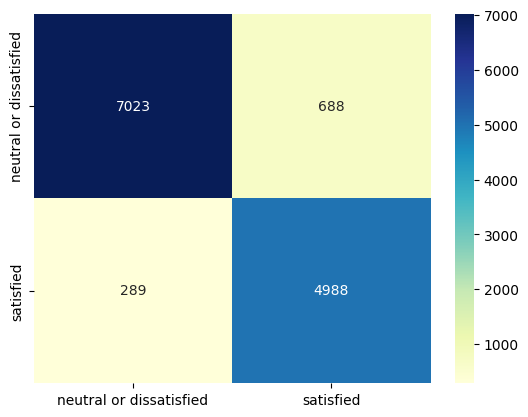

In [82]:
cm_matrix = pd.DataFrame(data=cm, columns=['neutral or dissatisfied','satisfied'], index=['neutral or dissatisfied','satisfied'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

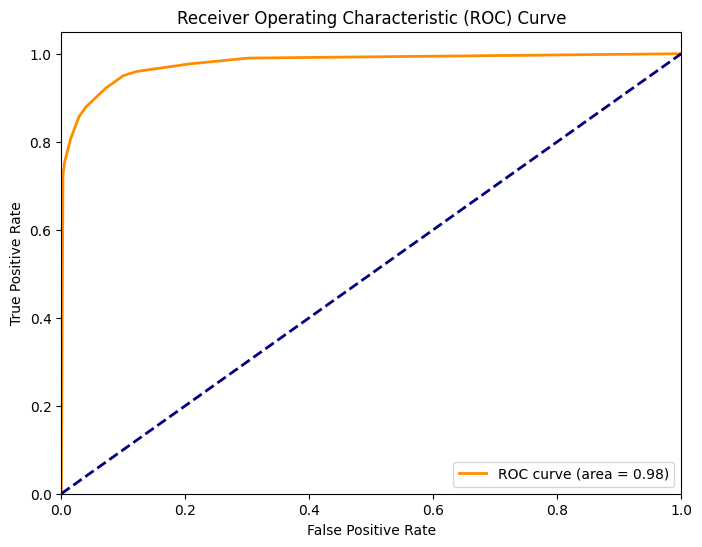

In [83]:
from sklearn.metrics import roc_curve, auc

y_prob = knn.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

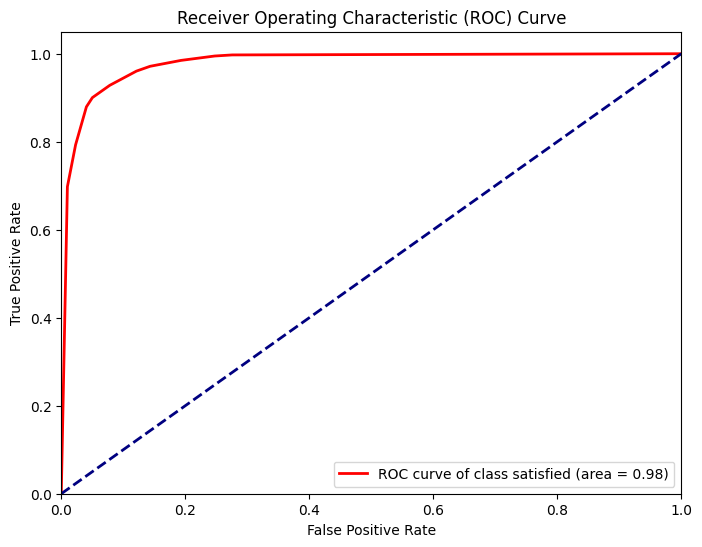

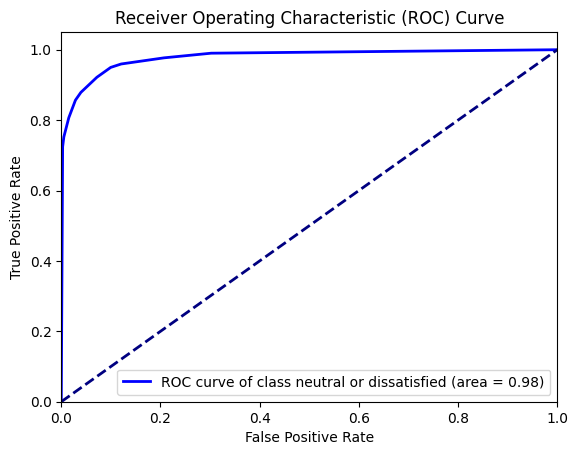

In [84]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = knn.predict_proba(X_test)
plt.figure(figsize=(8, 6))

colors = ['red', 'blue']

for i, satisfaction in enumerate(['satisfied', 'neutral or dissatisfied']):
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, i])
    roc_auc = auc(fpr, tpr)

    if satisfaction == 'satisfied' :
        plt.plot(tpr, fpr, color=colors[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(satisfaction, 1-roc_auc))
    else :
        plt.plot(fpr, tpr, color=colors[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(satisfaction, roc_auc))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [113]:
df = pd.read_csv('output.csv')
df = df[f_names]
df['Type of Travel'] = df['Type of Travel'].map({'Business travel': 1, 'Personal travel': 0})
df = (df - d_mean)/d_std
dt.predict(df)


array(['neutral or dissatisfied'], dtype=object)

**Decision Tree**

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
objects.append(dt)
le.fit(y_train)
y_pred = le.transform(y_pred)
algos.append('Decision Tree')
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
accuracy.append(accuracy_score(y_test,y_pred))

Model accuracy score: 0.9326


In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))
auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", auc)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7342
           1       0.92      0.93      0.92      5646

    accuracy                           0.93     12988
   macro avg       0.93      0.93      0.93     12988
weighted avg       0.93      0.93      0.93     12988

ROC AUC Score: 0.9311700827161238


In [116]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
print('Confusion matrix\n\n',cm)

Confusion matrix

 [[6889  453]
 [ 423 5223]]


<Axes: >

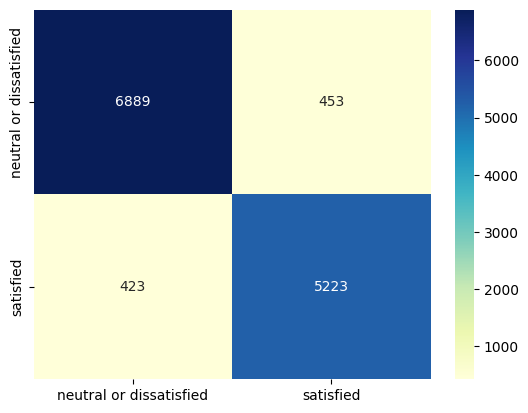

In [117]:
cm_matrix = pd.DataFrame(data=cm, columns=['neutral or dissatisfied','satisfied'], index=['neutral or dissatisfied','satisfied'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

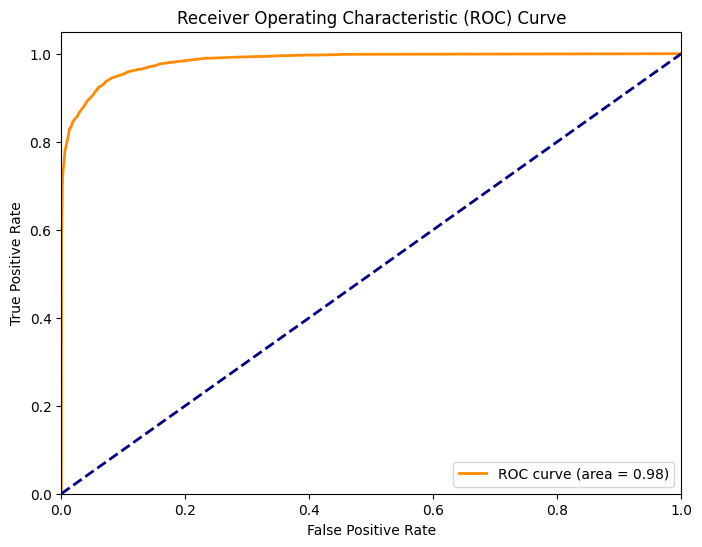

In [118]:
from sklearn.metrics import roc_curve, auc

y_prob = dt.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

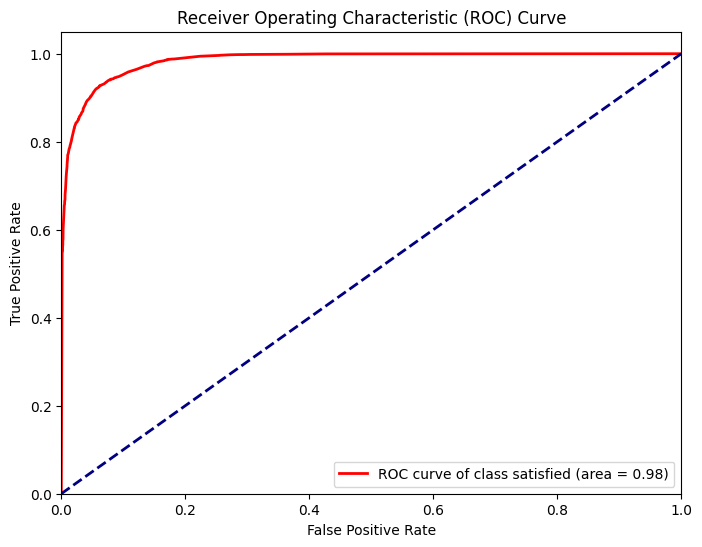

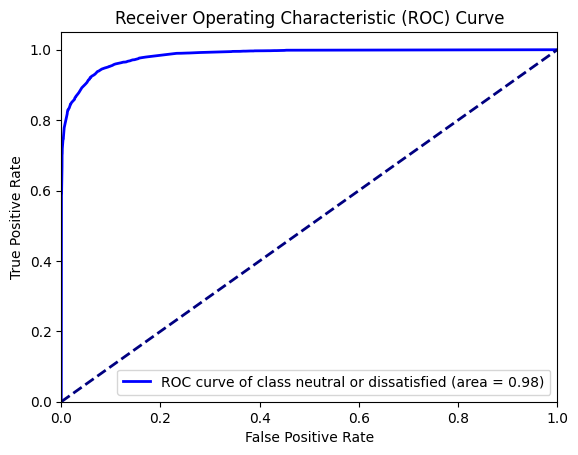

In [119]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = dt.predict_proba(X_test)

plt.figure(figsize=(8, 6))

colors = ['red', 'blue']

for i, satisfaction in enumerate(['satisfied', 'neutral or dissatisfied']):
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, i])
    roc_auc = auc(fpr, tpr)

    if satisfaction == 'satisfied' :
        plt.plot(tpr, fpr, color=colors[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(satisfaction, 1-roc_auc))
    else :
        plt.plot(fpr, tpr, color=colors[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(satisfaction, roc_auc))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

**Random Forest**

In [120]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
objects.append(rf)
algos.append('Random Forest')
from sklearn.metrics import accuracy_score
y_pred = le.transform(y_pred)
print('Model accuracy score : {0:0.4f}'.format(accuracy_score(y_test,y_pred)))
accuracy.append(accuracy_score(y_test,y_pred))

Model accuracy score : 0.9323


In [121]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))
auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", auc)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7329
           1       0.92      0.92      0.92      5659

    accuracy                           0.93     12988
   macro avg       0.93      0.93      0.93     12988
weighted avg       0.93      0.93      0.93     12988

ROC AUC Score: 0.9310634877861101


In [122]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
print('Confusion matrix\n\n',cm)

Confusion matrix

 [[6881  448]
 [ 431 5228]]


<Axes: >

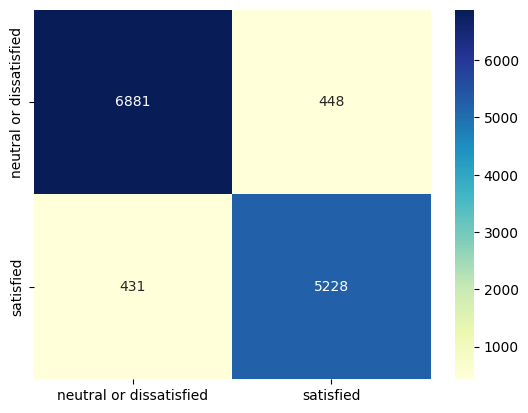

In [123]:
cm_matrix = pd.DataFrame(data=cm, columns=['neutral or dissatisfied','satisfied'], index=['neutral or dissatisfied','satisfied'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

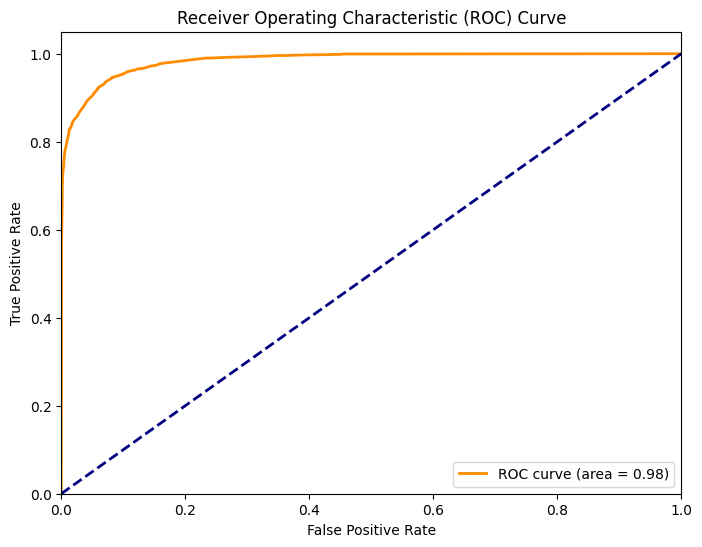

In [124]:
from sklearn.metrics import roc_curve, auc

y_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

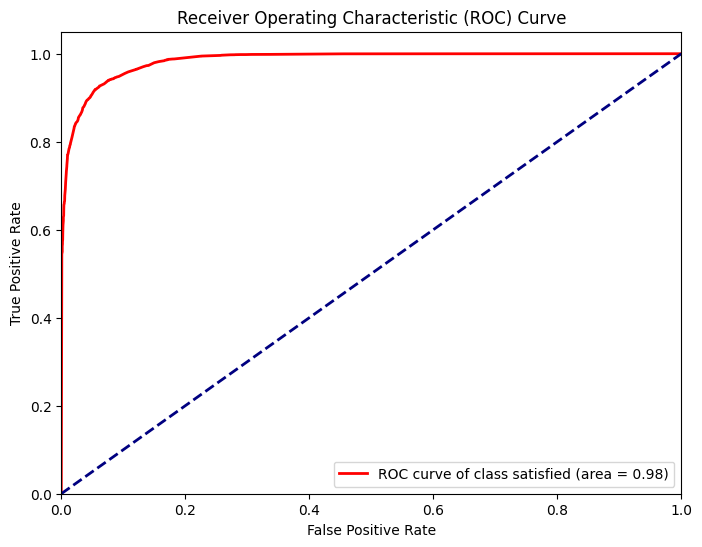

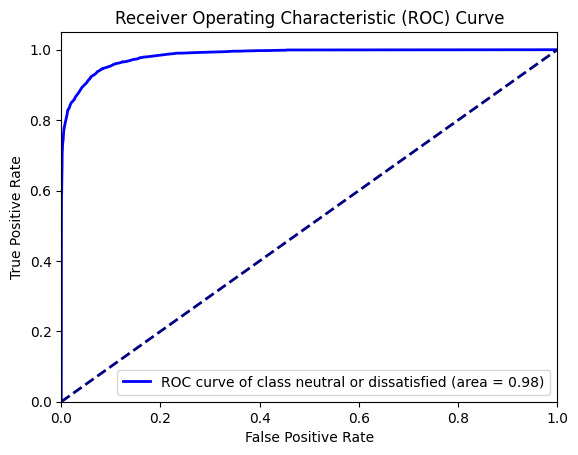

In [125]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = rf.predict_proba(X_test)

plt.figure(figsize=(8, 6))

colors = ['red', 'blue']

for i, satisfaction in enumerate(['satisfied', 'neutral or dissatisfied']):
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, i])
    roc_auc = auc(fpr, tpr)

    if satisfaction == 'satisfied' :
        plt.plot(tpr, fpr, color=colors[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(satisfaction, 1-roc_auc))
    else :
        plt.plot(fpr, tpr, color=colors[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(satisfaction, roc_auc))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

**Logistic Regression**

In [126]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
objects.append(lr)
algos.append('Logistic Regression')
from sklearn.metrics import accuracy_score
y_pred = le.transform(y_pred)
acc = accuracy_score(y_test,y_pred)
print('Model accuracy score : {0:0.4f}'.format(acc))
accuracy.append(acc)

Model accuracy score : 0.8469


In [127]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))
auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", auc)

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      7452
           1       0.81      0.83      0.82      5536

    accuracy                           0.85     12988
   macro avg       0.84      0.85      0.84     12988
weighted avg       0.85      0.85      0.85     12988

ROC AUC Score: 0.8430882151112674


In [128]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
print('Confusion matrix\n\n',cm)

Confusion matrix

 [[6388 1064]
 [ 924 4612]]


<Axes: >

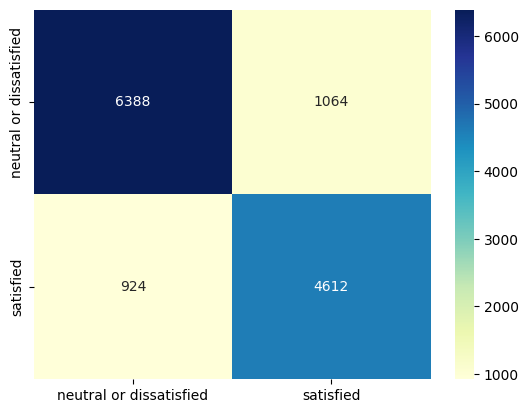

In [129]:
cm_matrix = pd.DataFrame(data=cm, columns=['neutral or dissatisfied','satisfied'], index=['neutral or dissatisfied','satisfied'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

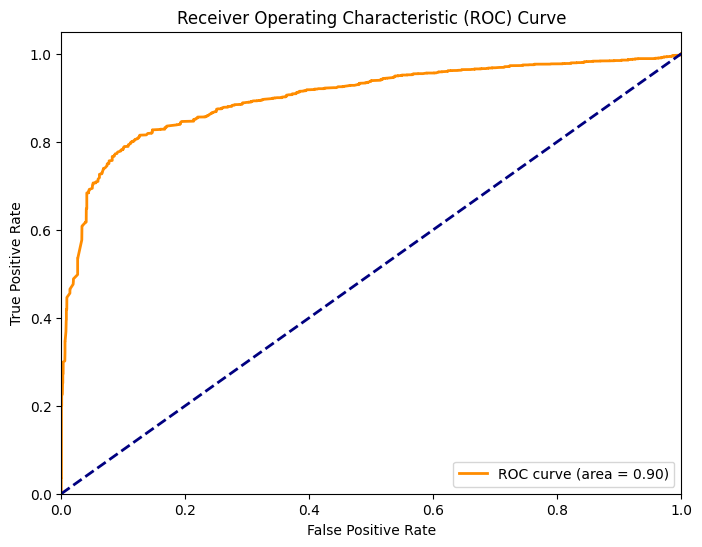

In [130]:
from sklearn.metrics import roc_curve, auc

y_prob = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

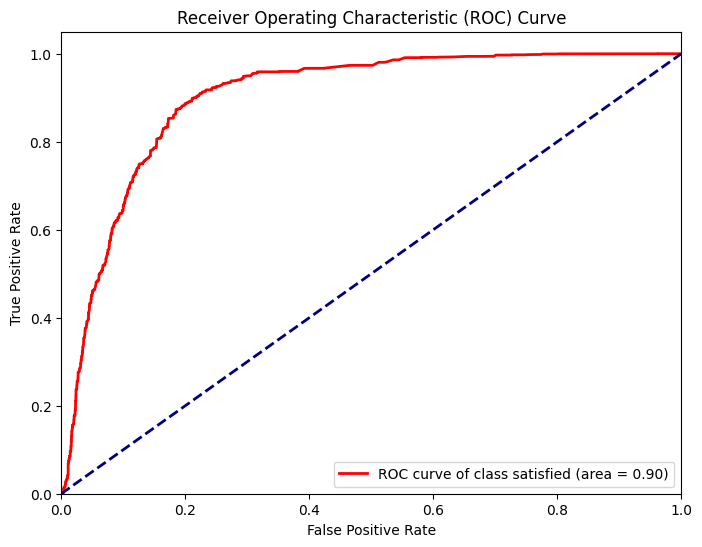

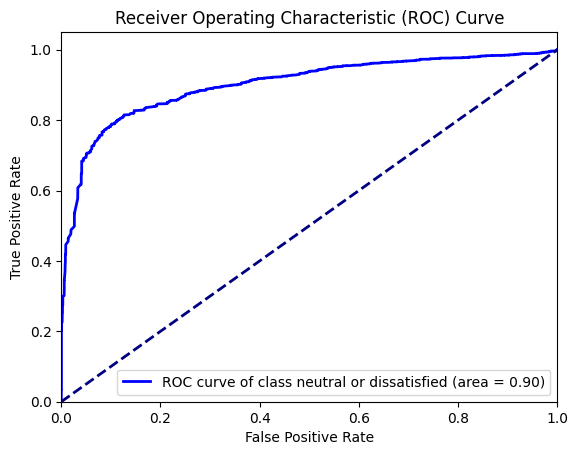

In [131]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = lr.predict_proba(X_test)

plt.figure(figsize=(8, 6))

colors = ['red', 'blue']

for i, satisfaction in enumerate(['satisfied', 'neutral or dissatisfied']):
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, i])
    roc_auc = auc(fpr, tpr)

    if satisfaction == 'satisfied' :
        plt.plot(tpr, fpr, color=colors[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(satisfaction, 1-roc_auc))
    else :
        plt.plot(fpr, tpr, color=colors[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(satisfaction, roc_auc))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

**Naive Bayes**

In [132]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
objects.append(nb)
algos.append('Naive Bayes')


In [133]:
from sklearn.metrics import classification_report
y_pred = le.transform(y_pred)

report = classification_report(y_test, y_pred)
print("Classification Report:", report)

k=accuracy_score(y_test,y_pred)
print(k)
accuracy.append(k)

Classification Report:               precision    recall  f1-score   support

           0       0.88      0.86      0.87      7312
           1       0.82      0.84      0.83      5676

    accuracy                           0.85     12988
   macro avg       0.85      0.85      0.85     12988
weighted avg       0.85      0.85      0.85     12988

0.8512473052048044


In [134]:


auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", auc)

ROC AUC Score: 0.8502878545004264


In [135]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
print('Confusion matrix\n\n',cm)

Confusion matrix

 [[6273  893]
 [1039 4783]]


<Axes: >

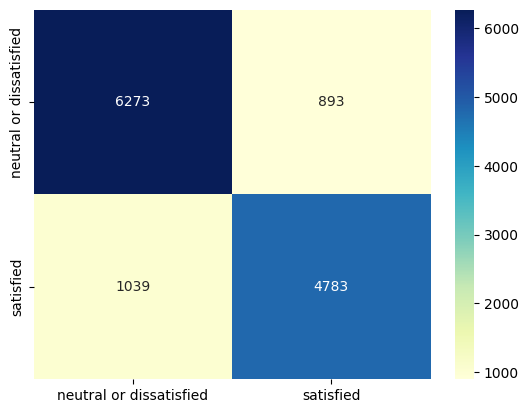

In [136]:
cm_matrix = pd.DataFrame(data=cm, columns=['neutral or dissatisfied','satisfied'], index=['neutral or dissatisfied','satisfied'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

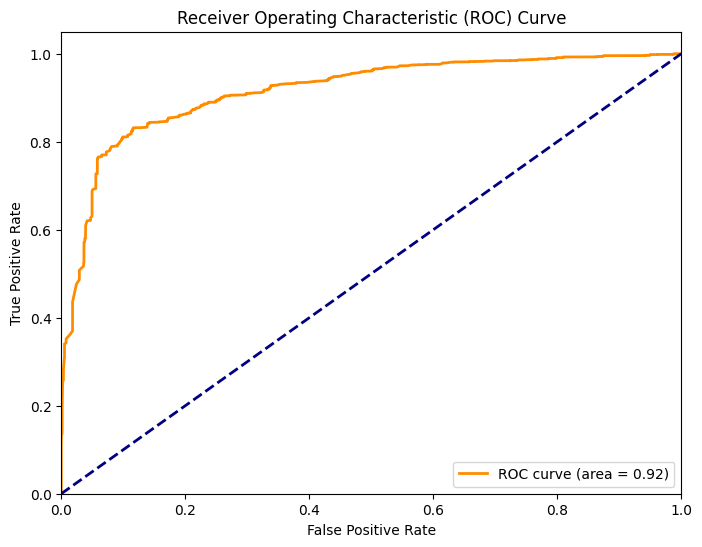

In [137]:
from sklearn.metrics import roc_curve, auc

y_prob = nb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

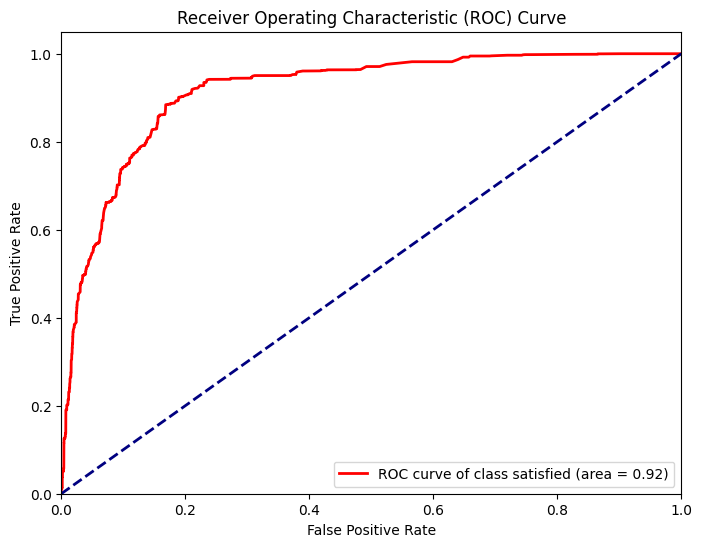

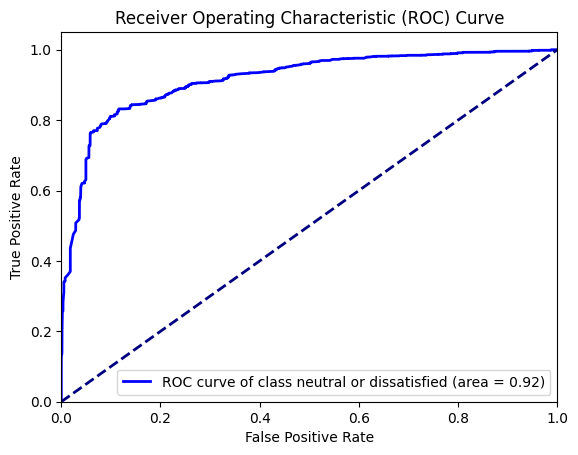

In [138]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = nb.predict_proba(X_test)

plt.figure(figsize=(8, 6))

colors = ['red', 'blue']

for i, satisfaction in enumerate(['satisfied', 'neutral or dissatisfied']):
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, i])
    roc_auc = auc(fpr, tpr)

    if satisfaction == 'satisfied' :
        plt.plot(tpr, fpr, color=colors[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(satisfaction, 1-roc_auc))
    else :
        plt.plot(fpr, tpr, color=colors[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(satisfaction, roc_auc))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

**SVM**

In [139]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
objects.append(svm)
algos.append('SVM')
from sklearn.metrics import accuracy_score
y_pred = le.transform(y_pred)
print('Model accuracy score : {0:0.4f}'.format(accuracy_score(y_test,y_pred)))
accuracy.append(accuracy_score(y_test,y_pred))

Model accuracy score : 0.9254


In [140]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))
auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", auc)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7297
           1       0.92      0.91      0.91      5691

    accuracy                           0.93     12988
   macro avg       0.92      0.92      0.92     12988
weighted avg       0.93      0.93      0.93     12988

ROC AUC Score: 0.924337646476469


In [141]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
print('Confusion matrix\n\n',cm)

Confusion matrix

 [[6820  477]
 [ 492 5199]]


<Axes: >

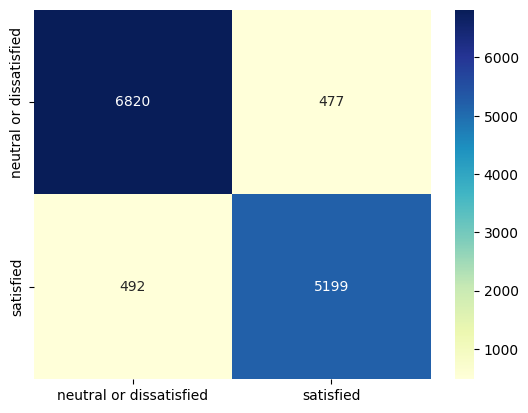

In [142]:
cm_matrix = pd.DataFrame(data=cm, columns=['neutral or dissatisfied','satisfied'], index=['neutral or dissatisfied','satisfied'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

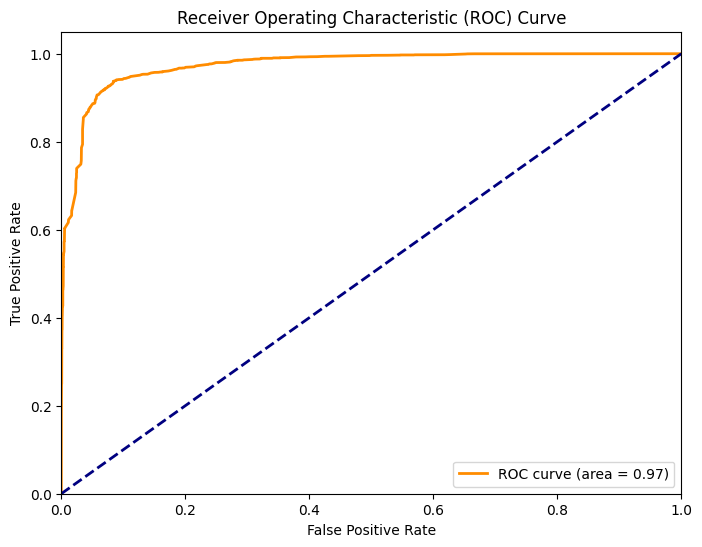

In [143]:
from sklearn.metrics import roc_curve, auc
import numpy as np
decision_scores = svm.decision_function(X_test)

y_prob = 1 / (1 + np.exp(-decision_scores))


fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

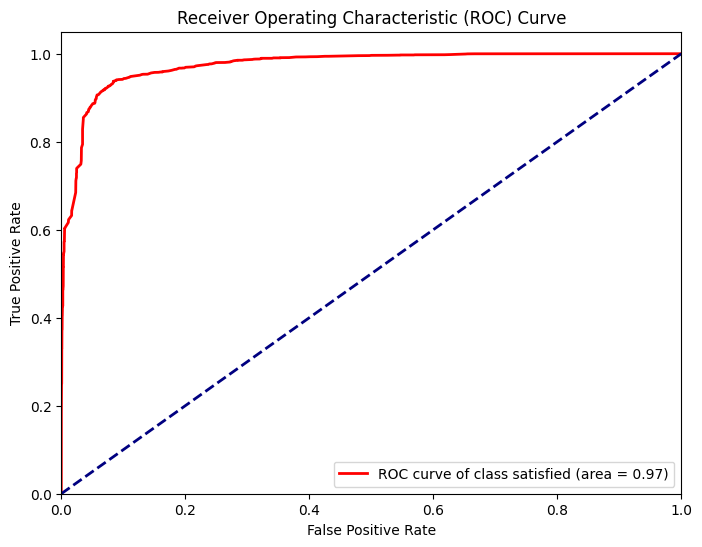

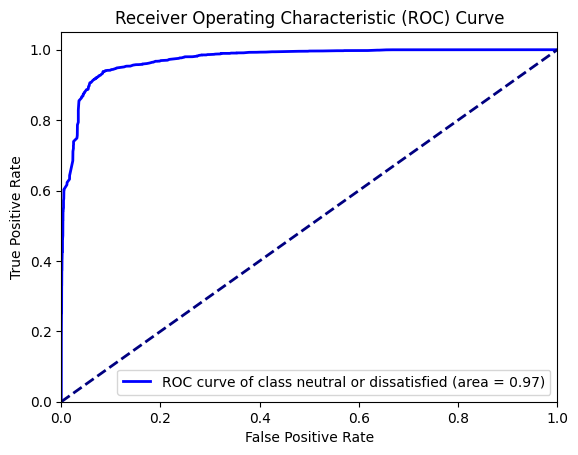

In [144]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

decision_scores = svm.decision_function(X_test)

y_prob = 1 / (1 + np.exp(-decision_scores))

plt.figure(figsize=(8, 6))

colors = ['red', 'blue']

for i, satisfaction in enumerate(['satisfied', 'neutral or dissatisfied']):
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    if satisfaction == 'satisfied' :
        plt.plot(fpr, tpr, color=colors[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(satisfaction, roc_auc))
    else :
        plt.plot(fpr, tpr, color=colors[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(satisfaction, roc_auc))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

**Gradient Boosting**

In [145]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
objects.append(gb)
algos.append('Gradient Boosting')
from sklearn.metrics import accuracy_score
y_pred = le.transform(y_pred)
print('Model accuracy score : {0:0.4f}'.format(accuracy_score(y_test,y_pred)))
accuracy.append(accuracy_score(y_test,y_pred))

Model accuracy score : 0.9154


In [146]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))
auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", auc)

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      7495
           1       0.89      0.92      0.90      5493

    accuracy                           0.92     12988
   macro avg       0.91      0.92      0.91     12988
weighted avg       0.92      0.92      0.92     12988

ROC AUC Score: 0.9122157982553127


In [147]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
print('Confusion matrix\n\n',cm)

Confusion matrix

 [[6854  641]
 [ 458 5035]]


<Axes: >

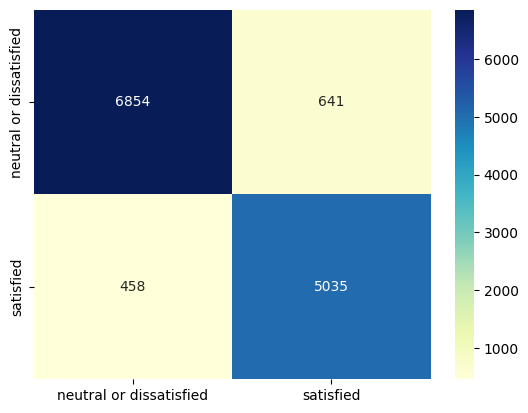

In [148]:
cm_matrix = pd.DataFrame(data=cm, columns=['neutral or dissatisfied','satisfied'], index=['neutral or dissatisfied','satisfied'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

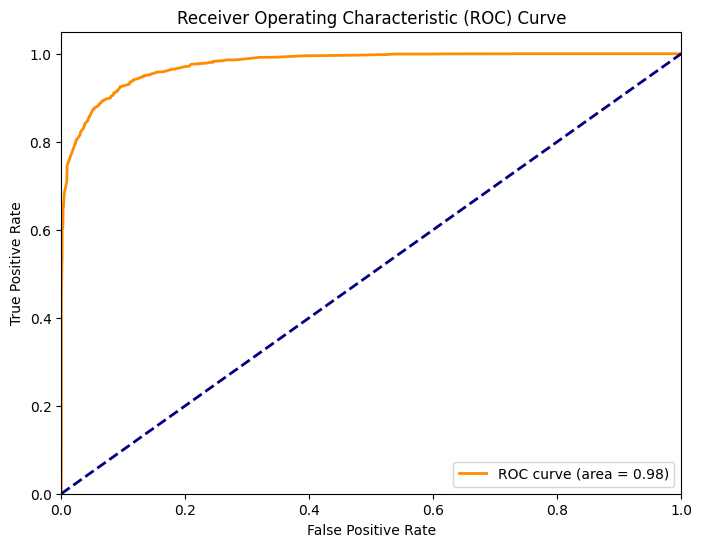

In [149]:
from sklearn.metrics import roc_curve, auc

y_prob = gb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

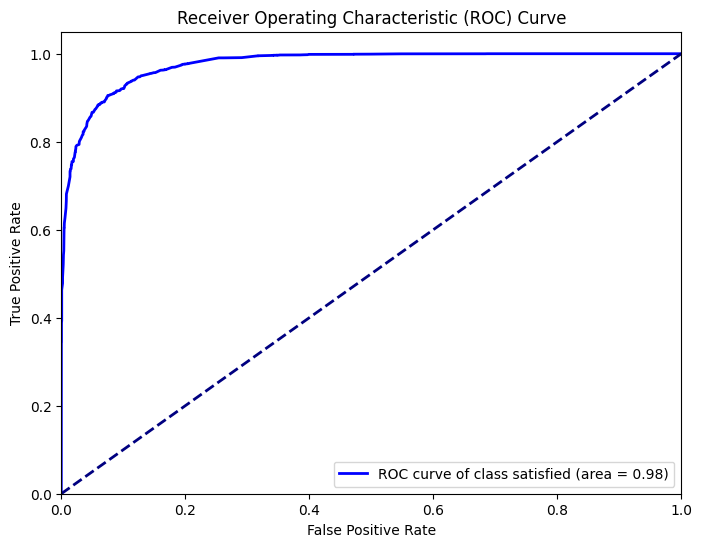

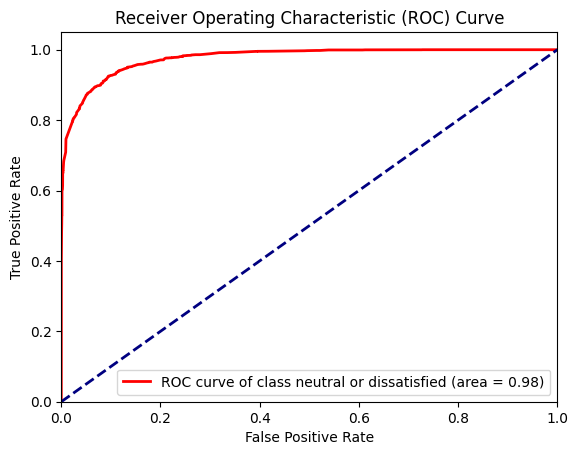

In [150]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = gb.predict_proba(X_test)

plt.figure(figsize=(8, 6))

colors = ['blue', 'red']

for i, satisfaction in enumerate(['satisfied', 'neutral or dissatisfied']):
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, i])
    roc_auc = auc(fpr, tpr)

    if satisfaction == 'satisfied' :
        plt.plot(tpr, fpr, color=colors[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(satisfaction, 1-roc_auc))
    else :
        plt.plot(fpr, tpr, color=colors[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(satisfaction, roc_auc))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

**Rule Induction**

In [151]:
import random
from deap import creator, base, tools, algorithms

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

def evaluate_individual(individual):
   
    clf = DecisionTreeClassifier(criterion=individual[0],
                                 max_depth=individual[1],
                                 min_samples_split=individual[2],
                                 min_samples_leaf=individual[3])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return accuracy_score(y_test, y_pred), 


param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 9),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 5)
}

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

toolbox.register("attr_bool", random.randint, 0, 1)

for param_name, param_values in param_grid.items():
    toolbox.register(param_name, random.choice, param_values)

toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, len(param_grid))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

population = toolbox.population(n=300)

toolbox.register("evaluate", evaluate_individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

for gen in range(40):
    offspring = toolbox.select(population, len(population))
    offspring = list(map(toolbox.clone, offspring))
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < 0.5:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values
    for mutant in offspring:
        if random.random() < 0.2:
            toolbox.mutate(mutant)
            del mutant.fitness.values
    valid_inds = [ind for ind in offspring if ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, valid_inds)
    for ind, fit in zip(valid_inds, fitnesses):
        ind.fitness.values = fit
    population[:] = offspring

best_individual = tools.selBest(population, 1)[0]
best_params = [param_grid[key][val] for key, val in zip(param_grid.keys(), best_individual)]

print("Best hyperparameters:", best_params)

best_model = DecisionTreeClassifier(criterion=best_params[0])
objects.append(best_model)
algos.append('Rule Induction')
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

y_pred = le.transform(y_pred)

acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print('Model accuracy score : {0:0.4f}'.format(acc))
accuracy.append(acc)

Best hyperparameters: ['entropy', 2, 3, 2]
Model accuracy score : 0.9326


In [152]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))
auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", auc)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7342
           1       0.92      0.93      0.92      5646

    accuracy                           0.93     12988
   macro avg       0.93      0.93      0.93     12988
weighted avg       0.93      0.93      0.93     12988

ROC AUC Score: 0.9311700827161238


In [153]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
print('Confusion matrix\n\n',cm)

Confusion matrix

 [[6889  453]
 [ 423 5223]]


<Axes: >

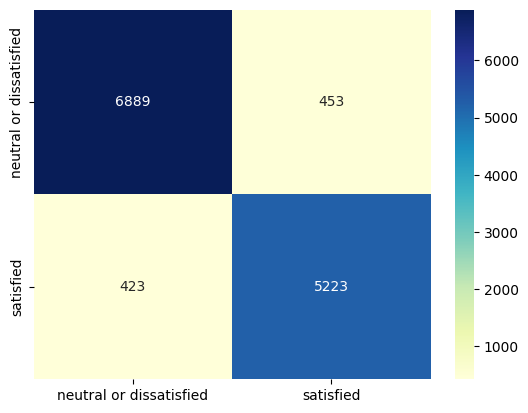

In [154]:
cm_matrix = pd.DataFrame(data=cm, columns=['neutral or dissatisfied','satisfied'], index=['neutral or dissatisfied','satisfied'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

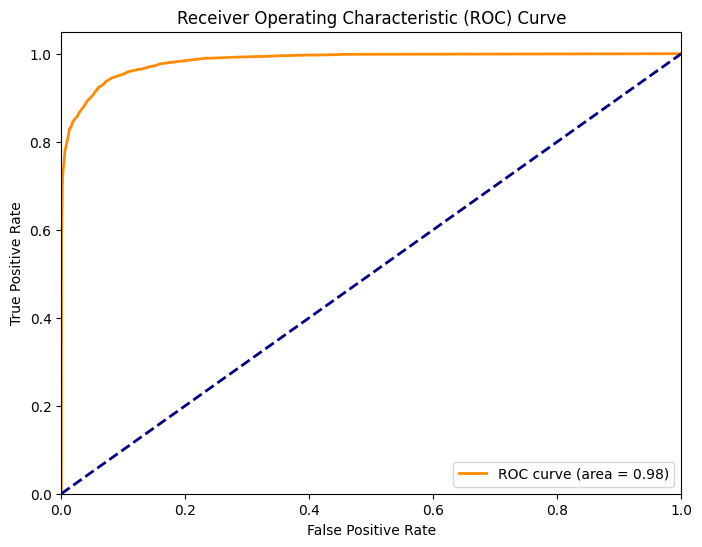

In [155]:
from sklearn.metrics import roc_curve, auc
import numpy as np 

best_model.fit(X_train, y_train)
y_prob = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

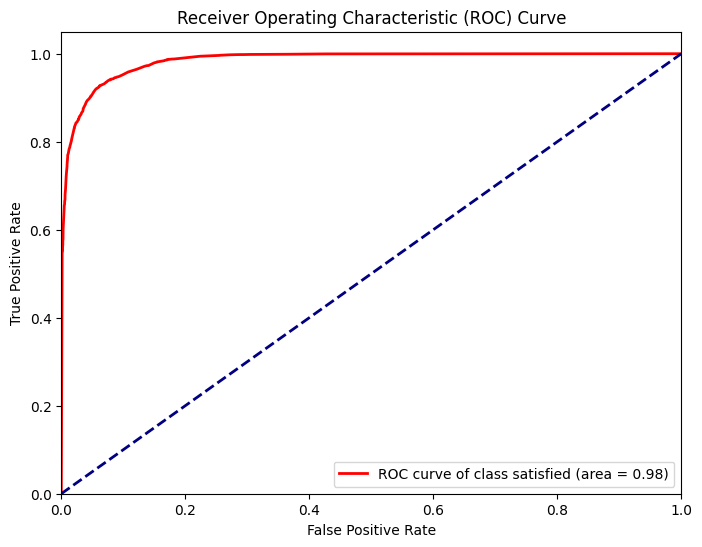

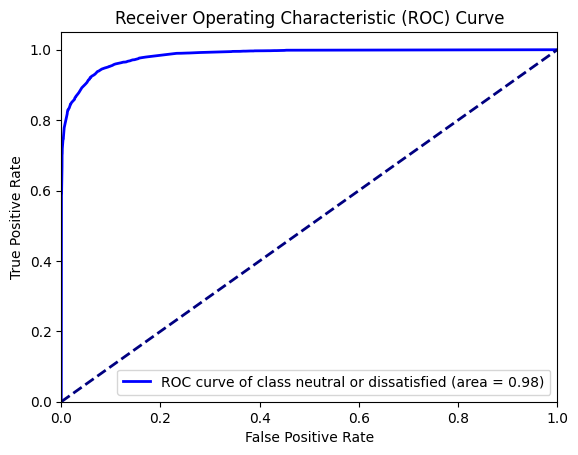

In [156]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = best_model.predict_proba(X_test)

plt.figure(figsize=(8, 6))

colors = ['red', 'blue']

for i, satisfaction in enumerate(['satisfied', 'neutral or dissatisfied']):
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, i])
    roc_auc = auc(fpr, tpr)

    if satisfaction == 'satisfied' :
        plt.plot(tpr, fpr, color=colors[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(satisfaction, 1-roc_auc))
    else :
        plt.plot(fpr, tpr, color=colors[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(satisfaction, roc_auc))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

**Neural Net**

In [157]:
import tensorflow as tf
from tensorflow import keras

n_features = 5
n_hidden_1 = 20
learning_rate = 0.01

model = tf.keras.Sequential([
    tf.keras.layers.Dense(n_hidden_1, activation='relu', input_shape=(n_features,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size = 0.1, random_state = 777)
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)
loss, acc = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", acc)
algos.append('Neural network')
new_data = np.array([selected_features])
prediction = model.predict(new_data)
accuracy.append(acc)


Epoch 1/10
3653/3653 ━━━━━━━━━━━━━━━━━━━━ 1s 230us/step - accuracy: 0.8972 - loss: 0.2508
Epoch 2/10
3653/3653 ━━━━━━━━━━━━━━━━━━━━ 1s 222us/step - accuracy: 0.9203 - loss: 0.1880
Epoch 3/10
3653/3653 ━━━━━━━━━━━━━━━━━━━━ 1s 221us/step - accuracy: 0.9205 - loss: 0.1861
Epoch 4/10
3653/3653 ━━━━━━━━━━━━━━━━━━━━ 1s 231us/step - accuracy: 0.9210 - loss: 0.1840
Epoch 5/10
3653/3653 ━━━━━━━━━━━━━━━━━━━━ 1s 228us/step - accuracy: 0.9218 - loss: 0.1816
Epoch 6/10
3653/3653 ━━━━━━━━━━━━━━━━━━━━ 1s 226us/step - accuracy: 0.9207 - loss: 0.1804
Epoch 7/10
3653/3653 ━━━━━━━━━━━━━━━━━━━━ 1s 227us/step - accuracy: 0.9212 - loss: 0.1802
Epoch 8/10
3653/3653 ━━━━━━━━━━━━━━━━━━━━ 1s 224us/step - accuracy: 0.9223 - loss: 0.1784
Epoch 9/10
3653/3653 ━━━━━━━━━━━━━━━━━━━━ 1s 228us/step - accuracy: 0.9226 - loss: 0.1803
Epoch 10/10
3653/3653 ━━━━━━━━━━━━━━━━━━━━ 1s 230us/step - accuracy: 0.9221 - loss: 0.1793
406/406 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step - accuracy: 0.9256 - loss: 0.1632
Test Loss: 0.170484170

406/406 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step
Confusion Matrix:
 [[6654  658]
 [ 373 5303]]
              precision    recall  f1-score   support

       False       0.91      0.95      0.93      7027
        True       0.93      0.89      0.91      5961

    accuracy                           0.92     12988
   macro avg       0.92      0.92      0.92     12988
weighted avg       0.92      0.92      0.92     12988

ROC AUC Score: 0.981755388633935


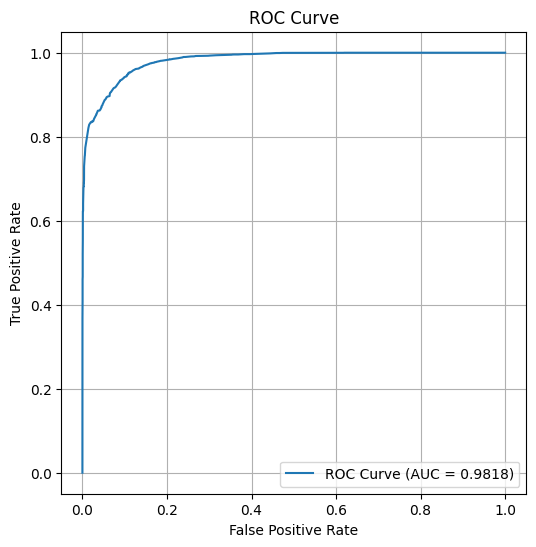

<Axes: >

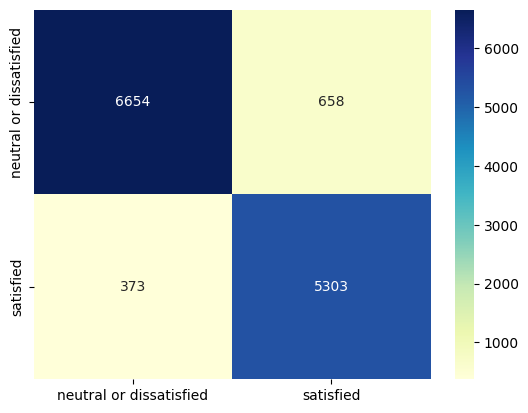

In [158]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred_classes = y_pred > 0.5

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:\n", cm)


from sklearn.metrics import classification_report
print(classification_report(y_pred_classes, y_test))

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", auc)

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.4f)' % auc)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

cm_matrix = pd.DataFrame(data=cm, columns=['neutral or dissatisfied','satisfied'], index=['neutral or dissatisfied','satisfied'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

406/406 ━━━━━━━━━━━━━━━━━━━━ 0s 202us/step


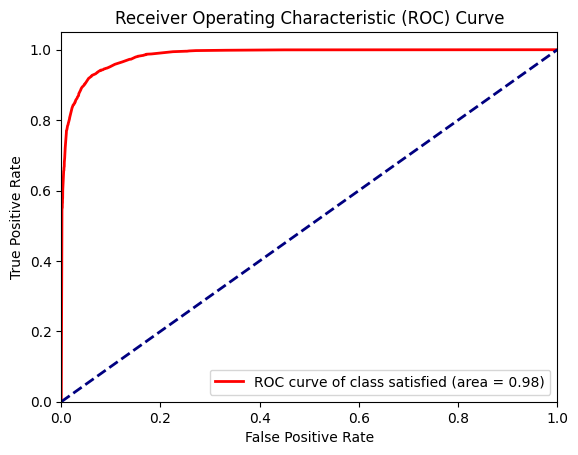

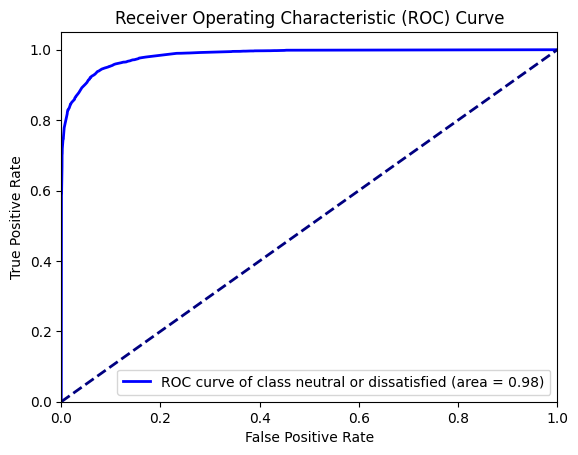

In [159]:
from sklearn.metrics import roc_auc_score
y_pred = model.predict(X_test)
for i, satisfaction in enumerate(['satisfied', 'neutral or dissatisfied']):
    tpr, fpr, _ = roc_curve(y_test, y_prob[:, i])
   
    if satisfaction == 'satisfied' :
        plt.plot(fpr, tpr, color=colors[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(satisfaction, roc_auc))
    else :
        plt.plot(tpr, fpr, color=colors[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(satisfaction, roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

**Deep Learning**

In [160]:
import tensorflow as tf
from tensorflow import keras

n_features = 5
n_hidden_1 = 10
learning_rate = 0.01

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(n_hidden_1, activation='relu', input_shape=(n_features,)),
    tf.keras.layers.Dense(30,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size = 0.1, random_state = 777)
model1.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

model1.fit(X_train, y_train, epochs=10)
loss, acc = model1.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", acc)
accuracy.append(acc)
algos.append('Deep learning')
new_data = np.array([selected_features])
prediction = model1.predict(new_data)

Epoch 1/10
3653/3653 ━━━━━━━━━━━━━━━━━━━━ 2s 281us/step - accuracy: 0.8989 - loss: 0.2365
Epoch 2/10
3653/3653 ━━━━━━━━━━━━━━━━━━━━ 1s 264us/step - accuracy: 0.9216 - loss: 0.1796
Epoch 3/10
3653/3653 ━━━━━━━━━━━━━━━━━━━━ 1s 268us/step - accuracy: 0.9240 - loss: 0.1760
Epoch 4/10
3653/3653 ━━━━━━━━━━━━━━━━━━━━ 1s 264us/step - accuracy: 0.9230 - loss: 0.1756
Epoch 5/10
3653/3653 ━━━━━━━━━━━━━━━━━━━━ 1s 264us/step - accuracy: 0.9227 - loss: 0.1747
Epoch 6/10
3653/3653 ━━━━━━━━━━━━━━━━━━━━ 1s 270us/step - accuracy: 0.9254 - loss: 0.1709
Epoch 7/10
3653/3653 ━━━━━━━━━━━━━━━━━━━━ 1s 274us/step - accuracy: 0.9257 - loss: 0.1715
Epoch 8/10
3653/3653 ━━━━━━━━━━━━━━━━━━━━ 1s 273us/step - accuracy: 0.9257 - loss: 0.1699
Epoch 9/10
3653/3653 ━━━━━━━━━━━━━━━━━━━━ 1s 278us/step - accuracy: 0.9258 - loss: 0.1695
Epoch 10/10
3653/3653 ━━━━━━━━━━━━━━━━━━━━ 1s 265us/step - accuracy: 0.9276 - loss: 0.1687
406/406 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - accuracy: 0.9328 - loss: 0.1524
Test Loss: 0.159328907

406/406 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step
Confusion Matrix:
 [[6894  418]
 [ 489 5187]]
              precision    recall  f1-score   support

       False       0.94      0.93      0.94      7383
        True       0.91      0.93      0.92      5605

    accuracy                           0.93     12988
   macro avg       0.93      0.93      0.93     12988
weighted avg       0.93      0.93      0.93     12988

ROC AUC Score: 0.9838905400180112


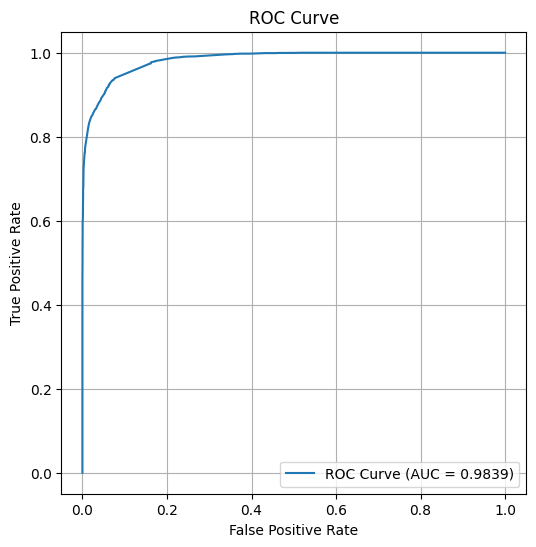

<Axes: >

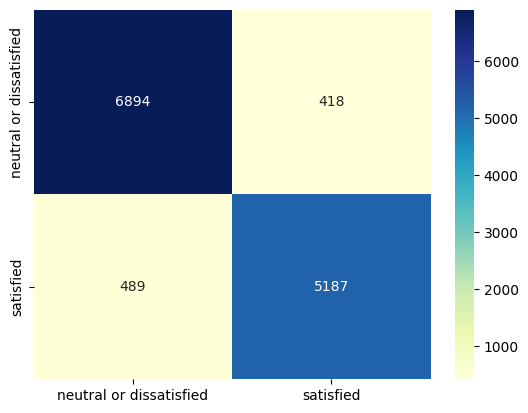

In [161]:
import matplotlib.pyplot as plt

y_pred = model1.predict(X_test)
y_pred_classes = y_pred > 0.5

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:\n", cm)

from sklearn.metrics import classification_report
print(classification_report(y_pred_classes, y_test))

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", auc)

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.4f)' % auc)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

cm_matrix = pd.DataFrame(data=cm, columns=['neutral or dissatisfied','satisfied'], index=['neutral or dissatisfied','satisfied'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

406/406 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step


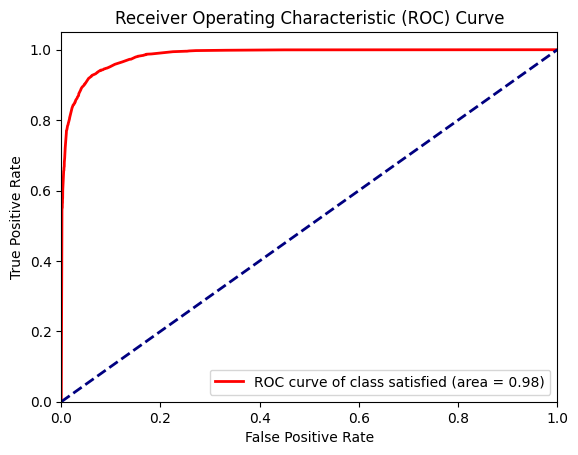

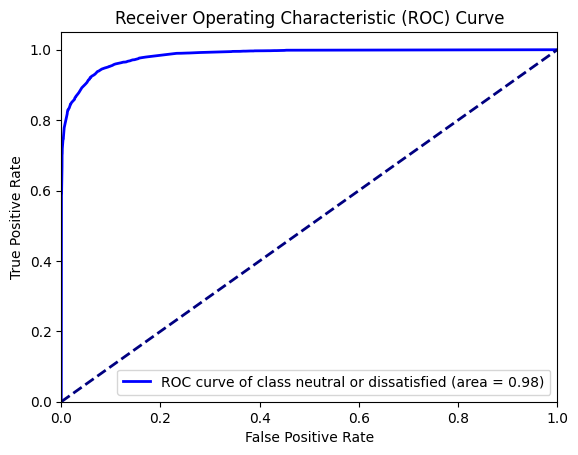

In [162]:
from sklearn.metrics import roc_auc_score
y_pred = model1.predict(X_test)
for i, satisfaction in enumerate(['satisfied', 'neutral or dissatisfied']):

    fpr, tpr, _ = roc_curve(y_test, y_prob[:, i])
    if satisfaction == 'satisfied' :
        plt.plot(tpr, fpr, color=colors[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(satisfaction, roc_auc))
    else :
        plt.plot(fpr, tpr, color=colors[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(satisfaction, roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [163]:
X_test_temp = X_test
y_test_temp = y_test

In [164]:
y_test_temp = le.fit_transform(y_test_temp)

406/406 ━━━━━━━━━━━━━━━━━━━━ 0s 197us/step
406/406 ━━━━━━━━━━━━━━━━━━━━ 0s 199us/step


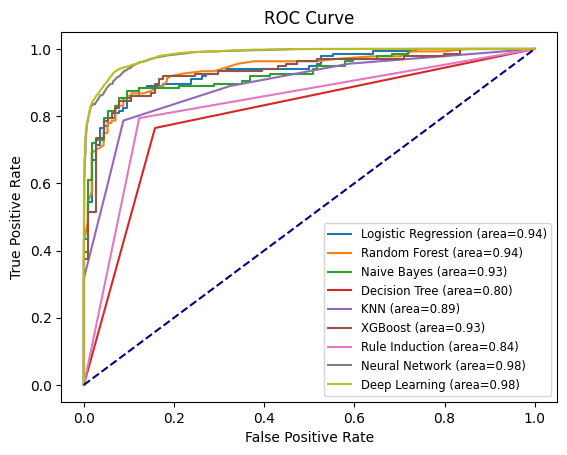

In [165]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


X, y = make_classification(n_samples=1000, n_classes=2)

X_train, X_test, y_train, y_test = train_test_split(X, y)

classifiers = [LogisticRegression(), RandomForestClassifier(),GaussianNB(), DecisionTreeClassifier(),KNeighborsClassifier(),GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),DecisionTreeClassifier(criterion=best_params[0]), model, model1]
names = ['Logistic Regression', 'Random Forest','Naive Bayes','Decision Tree','KNN','XGBoost','Rule Induction', 'Neural Network','Deep Learning' ]
scores = []

for clf in classifiers:
    if clf==model1 :
        score = model1.predict(X_test_temp)
        scores.append(score)
        continue

    elif clf==model :
        score = model.predict(X_test_temp)
        scores.append(score)
        continue

    clf.fit(X_train, y_train)
    score = clf.predict_proba(X_test)[:, 1]
    scores.append(score)

 
plt.figure()

for score, name in zip(scores,names):
    if name=='Neural Network' :
        fpr, tpr, _ = roc_curve(y_test_temp, score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr,tpr,label=f'{name} (area={roc_auc:.2f})')
        continue

    if name=='Deep Learning' :
        fpr, tpr, _ = roc_curve(y_test_temp, score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr,tpr,label=f'{name} (area={roc_auc:.2f})')
        continue
        
    fpr, tpr, _ = roc_curve(y_test,score)
    roc_auc = auc(fpr,tpr)
    
    plt.plot(fpr,tpr,label=f'{name} (area={roc_auc:.2f})')


plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right", fontsize = 'small')
plt.show()


In [166]:
print(algos)
print(accuracy)

['KNN', 'Decision Tree', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Naive Bayes', 'SVM', 'Gradient Boosting', 'Rule Induction', 'Neural network', 'Deep learning']
[0.9247767169695104, 0.9325531259624269, 0.9325531259624269, 0.9323221435170927, 0.8469356328919002, 0.8512473052048044, 0.925392670157068, 0.9153834308592547, 0.9325531259624269, 0.920619010925293, 0.9301663041114807]


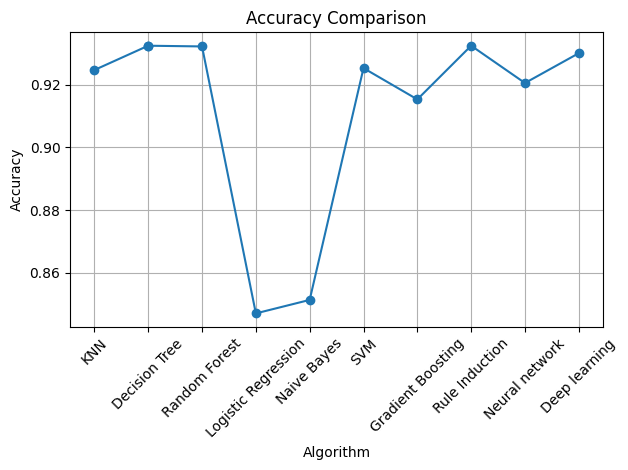

In [167]:
plt.plot(algos, accuracy, marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.grid(True)
plt.tight_layout() 
plt.show()